# <span style="color:orange"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:purple">  Numerical exercises 8</span>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm
M=100000 #number of throws
N=100 #number of blocks
mu = 1
sigma = 0.2
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def psi(x, A, mu, sigma):
    return gaussian(x, A, mu, sigma)+gaussian(x, A, -mu, sigma)

def psi2(x, A, mu, sigma):
    return psi(x, A, mu, sigma)*psi(x, A, mu, sigma)

In Quantum Mechanics, the variational principle asserts that the expectation value of the Hamiltonian operator $\hat{H}$ over a well-chosen trial quantum state ($\Psi_2$ ) serves as a lower bound for the ground state energy ($E_0$):
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$
In this exercise, we aim to variationally optimize the ground state of a single quantum particle in one-dimensional (1D) space, subject to the external potential:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$
 
Solving this 1D quantum model analytically is not feasible, necessitating the use of numerical methods. To approximate the ground state wave function, the Variational Monte Carlo method employs a trial wave function parametrized by a set of variational parameters. The proposed trial wave function is as follows:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
$\Psi_T^{\sigma,\mu}(x)$ relies on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>. These parameters enable us to optimize the trial wave function and subsequently estimate the ground state energy of the quantum system.

## Exercise 8.1

### Implementation of Uniform Metropolis Step for Sampling $\psi^2$



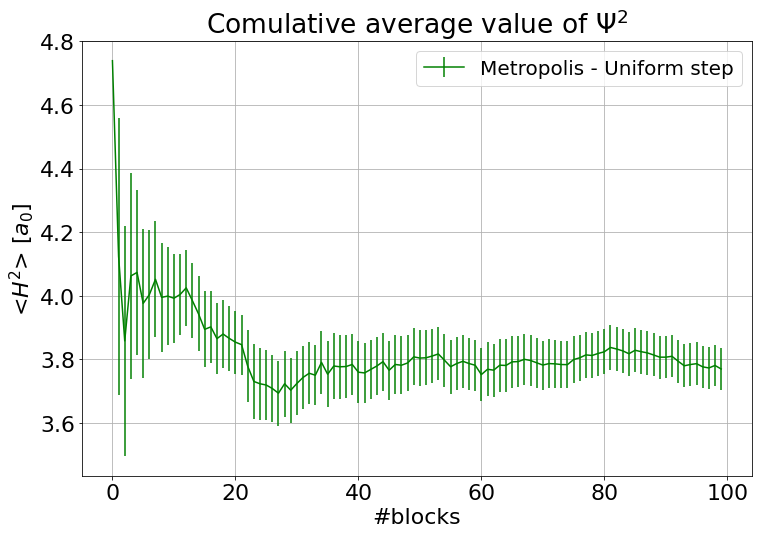

In [2]:
x_unif, rad_unif,rad_unif_err = np.loadtxt("./data/output_H_0.dat", usecols=(0,1,2), unpack='true')

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12, 8))
plt.title("Comulative average value of $\Psi^2$")
plt.errorbar(x_unif,rad_unif,yerr=rad_unif_err,color="green",label="Metropolis - Uniform step")
#plt.hlines(3/2,0,100,color ="red",label="Analytical value")
plt.xlabel('#blocks')
plt.ylabel('<$H^2$> [$a_0$]')
plt.grid(True)
plt.legend(prop={'size': 20})

plt.show()

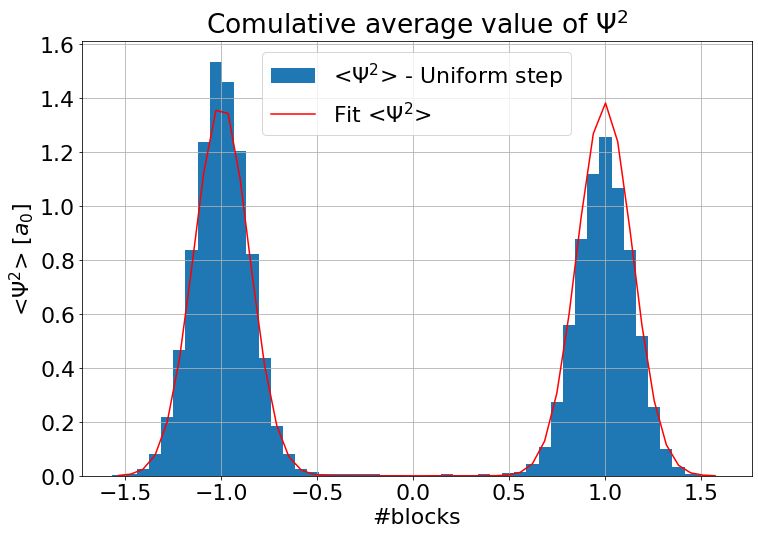

In [57]:
x = np.loadtxt("./data/output_x_psi2_0.dat", usecols=(0), unpack='true')

# Crea un istogramma
hist, bin_edges = np.histogram(x, bins=50, density=True)

# Calcola il punto medio dei bin (valori x) bins center
x_dat = (bin_edges[:-1] + bin_edges[1:]) / 2

# Conteggi dell'istogramma (valori y)
y_dat = hist

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12, 8))
plt.title("Comulative average value of $\Psi^2$")
plt.hist(x,bins= 50,label="<$\Psi^2$> - Uniform step",density=True)
#plt.hlines(3/2,0,100,color ="red",label="Analytical value")
plt.xlabel('#blocks')
plt.ylabel('<$\Psi^2$> [$a_0$]')
plt.grid(True)
plt.legend(prop={'size': 20})

#FIT
params, covariance =curve_fit(psi2, x_dat, y_dat, p0=[1, 1, 1])

# Estrai i parametri adattati
A_fit, mu_fit, sigma_fit = params

# Calcola la curva adattata
y_fit = psi2(x_dat, A_fit, mu_fit, sigma_fit)

# Plotta la curva adattata
plt.plot(x_dat, y_fit, 'r-', label='Fit <$\Psi^2$>')

plt.legend()
plt.show()

## Exercise 8.2

### Implementation of Uniform Metropolis Step for Sampling $\psi^2$

In this exercise, we focus on the implementation of a Uniform Metropolis Step for the purpose of sampling the $\psi^2$. The goal is to efficiently generate samples from the $\psi^2$ probability distribution using the Metropolis algorithm. This process is a crucial component in various computational and quantum mechanical simulations, allowing us to explore and understand the behavior of quantum systems.


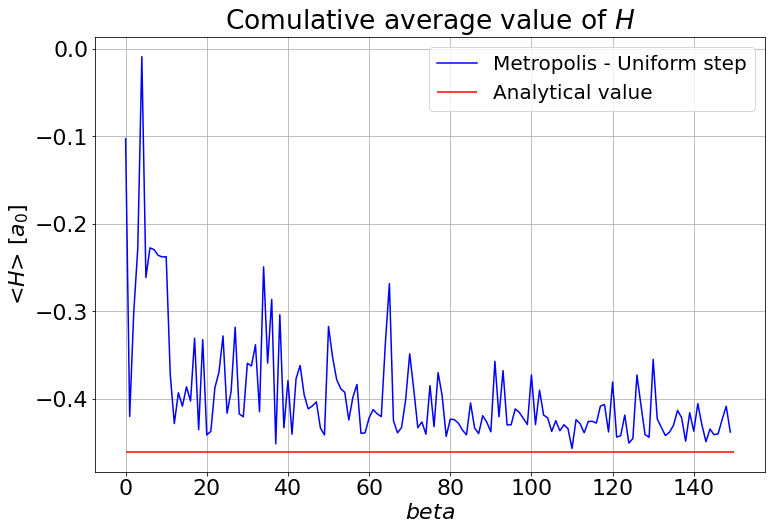

In [53]:
temp,mu, sigma, H = np.loadtxt("./data/out_opt_1.dat", usecols=(0,1,2,3), unpack = True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12, 8))
plt.title("Comulative average value of $H$")
plt.plot(H,color="blue",label="Metropolis - Uniform step")
plt.xlabel('$beta $')
plt.ylabel('<$H$> [$a_0$]')
plt.hlines(-0.46046587969271513,0,len(H),color ="red",label="Analytical value")
plt.grid(True)
plt.legend(prop={'size': 20})

plt.show()

best variational parameters:  mu = 0.795222  sigma = 0.612471


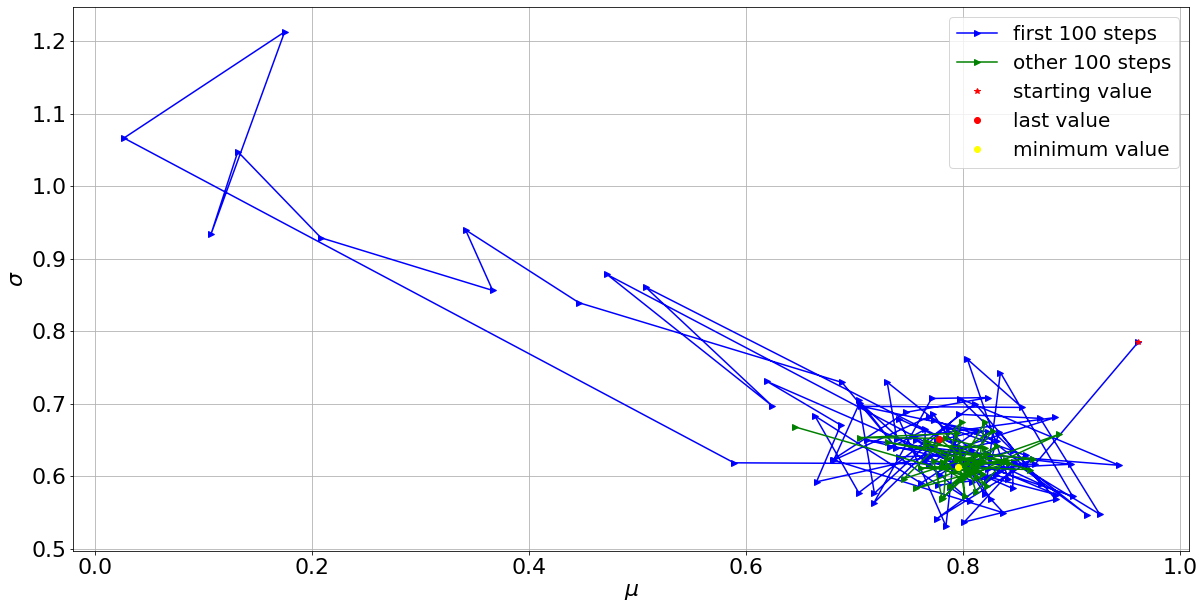

In [54]:
temp,mu, sigma, H = np.loadtxt("./data/out_opt_1.dat", usecols=(0,1,2,3), unpack = True)

min_mu    = mu[np.argsort(H)[0]]
min_sigma = sigma[np.argsort(H)[0]]

print("best variational parameters:  mu =",min_mu , " sigma =",min_sigma )


fig = plt.figure( figsize = (20,10) )
plt.plot(mu[:100],sigma[:100], "->" , color = "blue", label = "first 100 steps")
plt.plot(mu[100:],sigma[100:], "->" , color = "green" , label = "other 100 steps")
plt.plot(mu[0] , sigma [0] , "*", color = 'red' ,label = "starting value")
plt.plot(mu[-1] , sigma [-1] ,"o", color = 'red', label = "last value")
plt.plot(min_mu,min_sigma,"o", color = 'yellow',label = "minimum value")
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

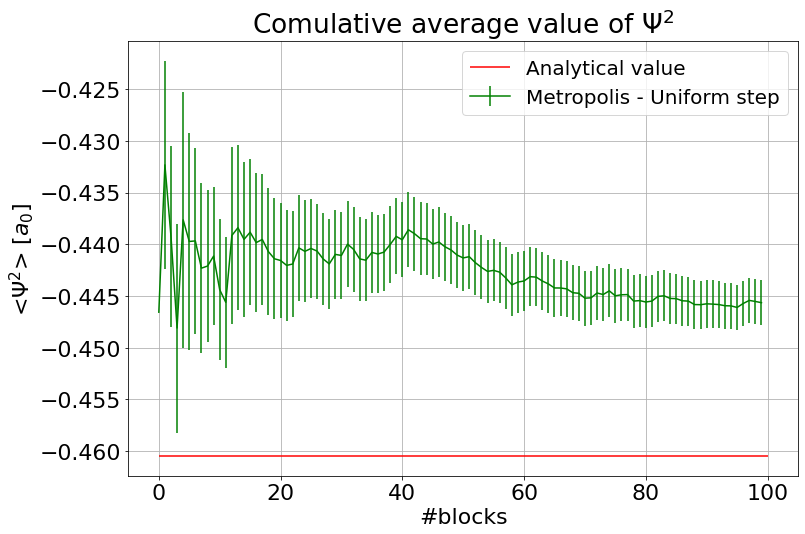

In [55]:
x_unif, rad_unif,rad_unif_err = np.loadtxt("./data/output_H_1.dat", usecols=(0,1,2), unpack='true')

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12, 8))
plt.title("Comulative average value of $\Psi^2$")
plt.errorbar(x_unif,rad_unif,yerr=rad_unif_err,color="green",label="Metropolis - Uniform step")
plt.hlines(-0.46046587969271513,0,100,color ="red",label="Analytical value")
plt.xlabel('#blocks')
plt.ylabel('<$\Psi^2$> [$a_0$]')
plt.grid(True)
plt.legend(prop={'size': 20})

plt.show()

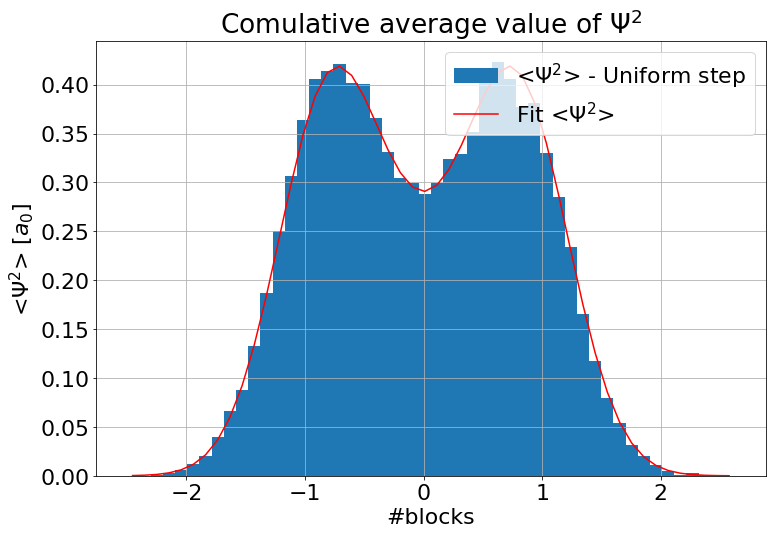

In [56]:
x = np.loadtxt("./data/output_x_psi2_1.dat", usecols=(0), unpack='true')

# Crea un istogramma
hist, bin_edges = np.histogram(x, bins=50, density=True)

# Calcola il punto medio dei bin (valori x) bins center
x_dat = (bin_edges[:-1] + bin_edges[1:]) / 2

# Conteggi dell'istogramma (valori y)
y_dat = hist

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12, 8))
plt.title("Comulative average value of $\Psi^2$")
plt.hist(x,bins= 50,label="<$\Psi^2$> - Uniform step",density=True)
#plt.hlines(3/2,0,100,color ="red",label="Analytical value")
plt.xlabel('#blocks')
plt.ylabel('<$\Psi^2$> [$a_0$]')
plt.grid(True)
plt.legend(prop={'size': 20})

#FIT
params, covariance =curve_fit(psi2, x_dat, y_dat, p0=[1, 1, 1])

# Estrai i parametri adattati
A_fit, mu_fit, sigma_fit = params

# Calcola la curva adattata
y_fit = psi2(x_dat, A_fit, mu_fit, sigma_fit)

# Plotta la curva adattata
plt.plot(x_dat, y_fit, 'r-', label='Fit <$\Psi^2$>')

plt.legend()
plt.show()